In [1]:
#import libraries 

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing data 
osi_df = pd.read_csv('online_shoppers_intention.csv', header = 0) 
osi_df.head() #total rows 12330 

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,17,180.133333,1.0,80.6,180,6512.010952,0.002646,0.012249,0.000000,0.0,Sep,2.0,2,1,3,Returning_Visitor,False,False
1,4,101.800000,0.0,0.0,91,5692.211713,0.006452,0.033623,0.000000,0.0,Sep,4.0,1,9,1,Returning_Visitor,False,False
2,10,1222.400000,0.0,0.0,26,2988.883333,0.000000,0.002903,0.000000,0.0,Sep,2.0,2,1,2,Returning_Visitor,False,False
3,0,0.000000,0.0,0.0,16,1062.666667,0.000000,0.012500,54.567049,0.0,Sep,4.0,1,1,4,New_Visitor,False,True
4,1,48.400000,0.0,0.0,22,2707.386667,0.000000,0.009722,0.000000,0.0,Sep,3.0,2,1,1,Returning_Visitor,True,False


In [3]:
osi_df["TrafficType"].value_counts()

2     3913
1     2451
3     2052
4     1069
13     738
10     450
6      444
8      343
5      260
11     247
20     198
9       42
7       40
15      38
19      17
14      13
18      10
16       3
17       1
12       1
Name: TrafficType, dtype: int64

In [4]:
osi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12202 non-null  float64
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12195 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12207 non-null  float64
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [5]:
osi_df.shape

(12330, 18)

In [6]:
duplicated_rows = osi_df[osi_df.duplicated(keep = 'first')]

In [7]:
duplicated_rows

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
1710,0,0.0,0.0,0.0,1,0.0,0.2,0.2,0.0,0.0,Nov,3.0,2,3,3,Returning_Visitor,False,False
2323,0,0.0,0.0,0.0,1,0.0,0.2,0.2,0.0,0.0,Nov,3.0,2,4,3,Returning_Visitor,False,False
2339,0,0.0,0.0,0.0,1,0.0,0.2,0.2,0.0,0.0,Nov,2.0,2,1,1,Returning_Visitor,False,False
2422,0,0.0,0.0,0.0,1,0.0,0.2,0.2,0.0,0.0,Nov,3.0,2,7,13,Returning_Visitor,False,False
2724,0,0.0,0.0,0.0,2,0.0,0.2,0.2,0.0,0.0,Nov,1.0,1,1,1,Returning_Visitor,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11734,0,0.0,0.0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1.0,1,1,2,New_Visitor,False,False
11736,0,0.0,0.0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1.0,1,4,1,Returning_Visitor,True,False
11827,0,0.0,0.0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1.0,1,1,3,Returning_Visitor,False,False
11834,0,0.0,0.0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1.0,13,9,20,Returning_Visitor,False,False


In [8]:
drop_duplicates = osi_df.drop_duplicates(subset = None, keep = 'first')

In [9]:
drop_duplicates.isnull().sum()

Administrative               0
Administrative_Duration      0
Informational              128
Informational_Duration       0
ProductRelated               0
ProductRelated_Duration      0
BounceRates                  0
ExitRates                    0
PageValues                 135
SpecialDay                   0
Month                        0
OperatingSystems           123
Browser                      0
Region                       0
TrafficType                  0
VisitorType                  0
Weekend                      0
Revenue                      0
dtype: int64

In [10]:
drop_duplicates.fillna(method = 'pad', inplace = True)

In [11]:
drop_duplicates.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [12]:
drop_duplicates.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12209.000000,12209.000000,12209.000000,12209.000000,12209.000000,12209.000000,12209.000000,12209.000000,12209.000000,12209.000000,12209.000000,12209.000000,12209.000000,12209.000000
mean,2.338111,81.619581,0.506839,34.814044,32.035466,1206.587017,0.020429,0.041518,5.956599,0.061922,2.124335,2.357605,3.152674,4.073225
std,3.330160,177.468917,1.273652,141.403041,44.589883,1919.411198,0.045365,0.046244,18.675499,0.199637,0.906113,1.709887,2.402206,4.016212
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,8.000000,192.875000,0.000000,0.014251,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,9.000000,0.000000,0.000000,18.000000,608.833333,0.002899,0.025000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,94.600000,0.000000,0.000000,38.000000,1476.500000,0.016667,0.048611,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [13]:
drop = drop_duplicates[["VisitorType", "Weekend","Revenue"]]

In [14]:
correlation = drop_duplicates.drop(columns = ["VisitorType", "Weekend","Revenue", 'Month'])

In [15]:
correlation.corr() ## Dependent variable = 'revenue', all other variables are independent 

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
Administrative,1.000000,0.600493,0.368383,0.254846,0.428396,0.371237,-0.213442,-0.311419,0.097575,-0.096870,-0.005518,-0.025537,-0.007078,-0.034520
Administrative_Duration,0.600493,1.000000,0.297816,0.237237,0.286935,0.353643,-0.137153,-0.202092,0.067370,-0.074615,-0.007898,-0.015687,-0.006609,-0.014911
Informational,0.368383,0.297816,1.000000,0.614993,0.369401,0.382609,-0.107234,-0.157385,0.045774,-0.048894,-0.010106,-0.037570,-0.030354,-0.033614
Informational_Duration,0.254846,0.237237,0.614993,1.000000,0.279114,0.346621,-0.070017,-0.102930,0.029140,-0.031236,-0.011153,-0.019543,-0.027824,-0.025083
ProductRelated,0.428396,0.286935,0.369401,0.279114,1.000000,0.860349,-0.193276,-0.286290,0.053453,-0.025766,0.003781,-0.013504,-0.039920,-0.044099
ProductRelated_Duration,0.371237,0.353643,0.382609,0.346621,0.860349,1.000000,-0.174186,-0.245483,0.049908,-0.038055,0.002390,-0.007650,-0.034700,-0.037279
BounceRates,-0.213442,-0.137153,-0.107234,-0.070017,-0.193276,-0.174186,1.000000,0.902538,-0.115298,0.087994,0.024111,-0.015922,0.001752,0.088280
ExitRates,-0.311419,-0.202092,-0.157385,-0.102930,-0.286290,-0.245483,0.902538,1.000000,-0.172771,0.116600,0.014426,-0.003716,-0.001874,0.086725
PageValues,0.097575,0.067370,0.045774,0.029140,0.053453,0.049908,-0.115298,-0.172771,1.000000,-0.065970,0.019257,0.046060,0.010369,0.013892
SpecialDay,-0.096870,-0.074615,-0.048894,-0.031236,-0.025766,-0.038055,0.087994,0.116600,-0.065970,1.000000,0.013315,0.003564,-0.016367,0.052905


<AxesSubplot:>

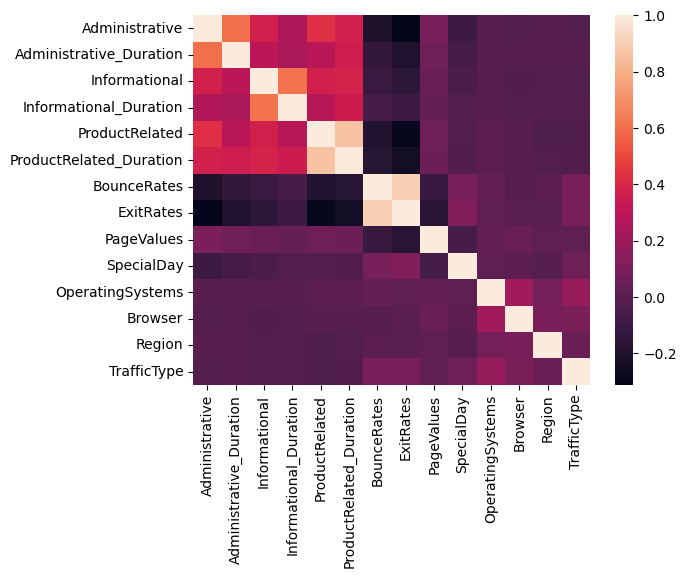

In [16]:
sns.heatmap(correlation.corr())

In [17]:
clean_df = drop_duplicates.drop(columns = ["SpecialDay","OperatingSystems","Browser", "Region", "TrafficType"])
clean_df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,Month,VisitorType,Weekend,Revenue
0,17,180.133333,1.0,80.6,180,6512.010952,0.002646,0.012249,0.000000,Sep,Returning_Visitor,False,False
1,4,101.800000,0.0,0.0,91,5692.211713,0.006452,0.033623,0.000000,Sep,Returning_Visitor,False,False
2,10,1222.400000,0.0,0.0,26,2988.883333,0.000000,0.002903,0.000000,Sep,Returning_Visitor,False,False
3,0,0.000000,0.0,0.0,16,1062.666667,0.000000,0.012500,54.567049,Sep,New_Visitor,False,True
4,1,48.400000,0.0,0.0,22,2707.386667,0.000000,0.009722,0.000000,Sep,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,12,248.228571,0.0,0.0,66,1158.782857,0.009722,0.022569,0.000000,Aug,Returning_Visitor,False,False
12326,1,28.533333,0.0,0.0,61,2006.688158,0.003279,0.015460,2.039270,Aug,Returning_Visitor,False,False
12327,3,117.850000,0.0,0.0,9,492.900000,0.000000,0.028571,29.462088,Aug,Returning_Visitor,False,False
12328,0,0.000000,4.0,112.6,93,2299.970000,0.002778,0.010937,16.959078,Aug,Returning_Visitor,False,True


In [18]:
clean_df["Revenue"].value_counts()

False    10301
True      1908
Name: Revenue, dtype: int64

In [19]:
test = clean_df

In [20]:
clean_df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues
count,12209.000000,12209.000000,12209.000000,12209.000000,12209.000000,12209.000000,12209.000000,12209.000000,12209.000000
mean,2.338111,81.619581,0.506839,34.814044,32.035466,1206.587017,0.020429,0.041518,5.956599
std,3.330160,177.468917,1.273652,141.403041,44.589883,1919.411198,0.045365,0.046244,18.675499
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,8.000000,192.875000,0.000000,0.014251,0.000000
50%,1.000000,9.000000,0.000000,0.000000,18.000000,608.833333,0.002899,0.025000,0.000000
75%,4.000000,94.600000,0.000000,0.000000,38.000000,1476.500000,0.016667,0.048611,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742


In [21]:
test['Revenue'].value_counts()

False    10301
True      1908
Name: Revenue, dtype: int64

In [22]:
df = test.groupby('Revenue').sum()
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,Weekend
Revenue,,,,,,,,,,
False,22071,768519.43860,4701.0,315122.064399,299136,1.115141e+07,239.656194,469.576335,21020.863004,2360
True,6475,227974.02935,1487.0,109922.602050,91985,3.579808e+06,9.763527,37.311261,51703.258828,499


In [23]:
subset = df.loc[:, ['BounceRates', 'ExitRates']]
subset

,BounceRates,ExitRates
Revenue,,
False,239.656194,469.576335
True,9.763527,37.311261


<IPython.core.display.Javascript object>


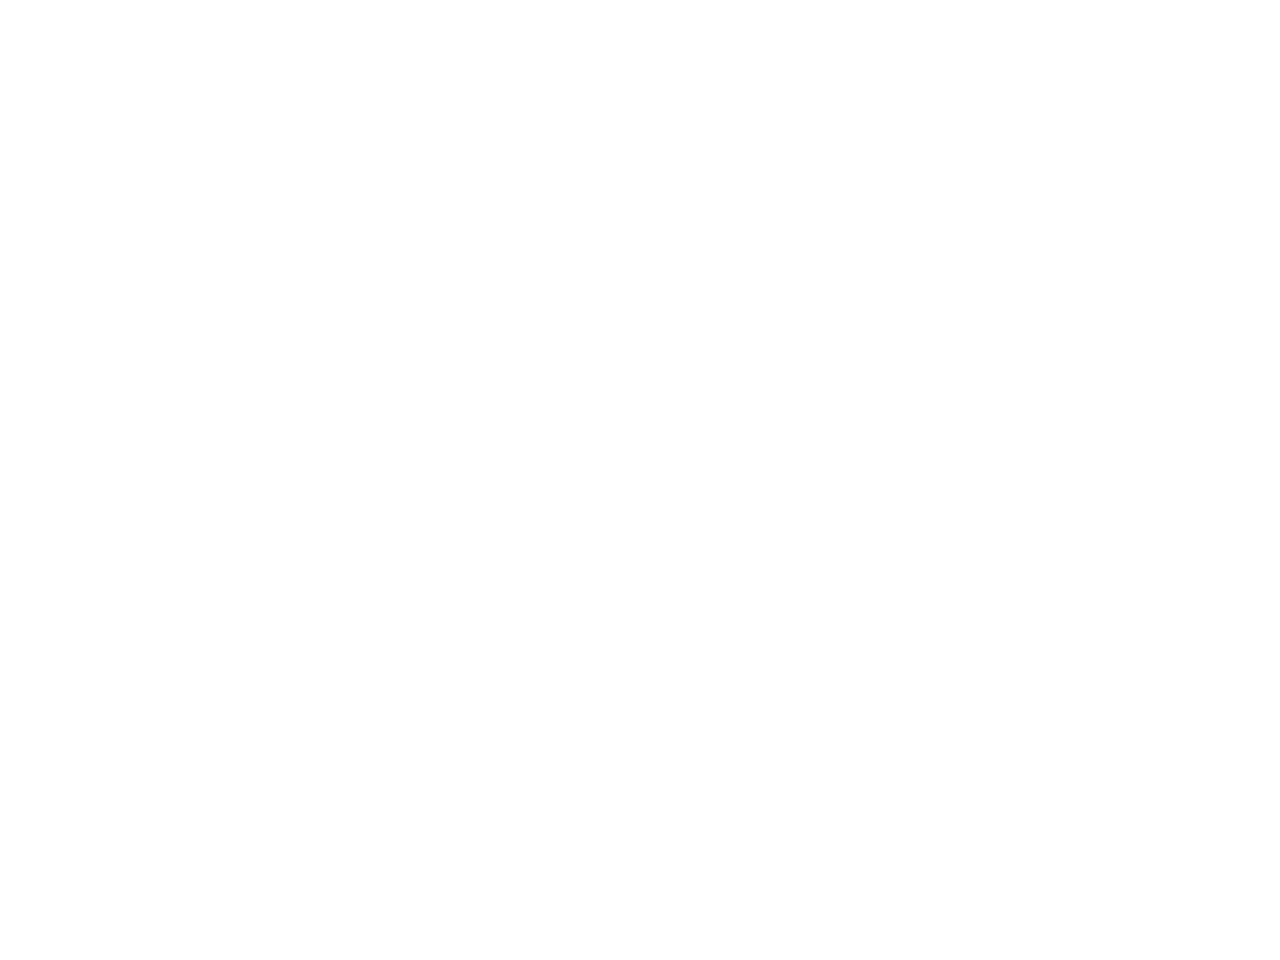

In [24]:
%matplotlib notebook

subset.plot.bar(colormap = 'Pastel2')
plt.title('Bounce vs. Exit Rates')
plt.xlabel('')
plt.ylabel('Sum')
plt.xticks(rotation=0, ha='right');

In [25]:
df1 = test.groupby('Revenue').count()
df1

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,Month,VisitorType,Weekend
Revenue,,,,,,,,,,,,
False,10301,10301,10301,10301,10301,10301,10301,10301,10301,10301,10301,10301
True,1908,1908,1908,1908,1908,1908,1908,1908,1908,1908,1908,1908


In [26]:
subset1 = df1.loc[:, ['BounceRates', 'ExitRates']]
subset1

,BounceRates,ExitRates
Revenue,,
False,10301,10301
True,1908,1908


<IPython.core.display.Javascript object>


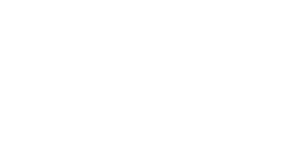

<AxesSubplot:xlabel='Revenue'>

In [27]:
%matplotlib notebook

subset1.plot.bar()

<IPython.core.display.Javascript object>


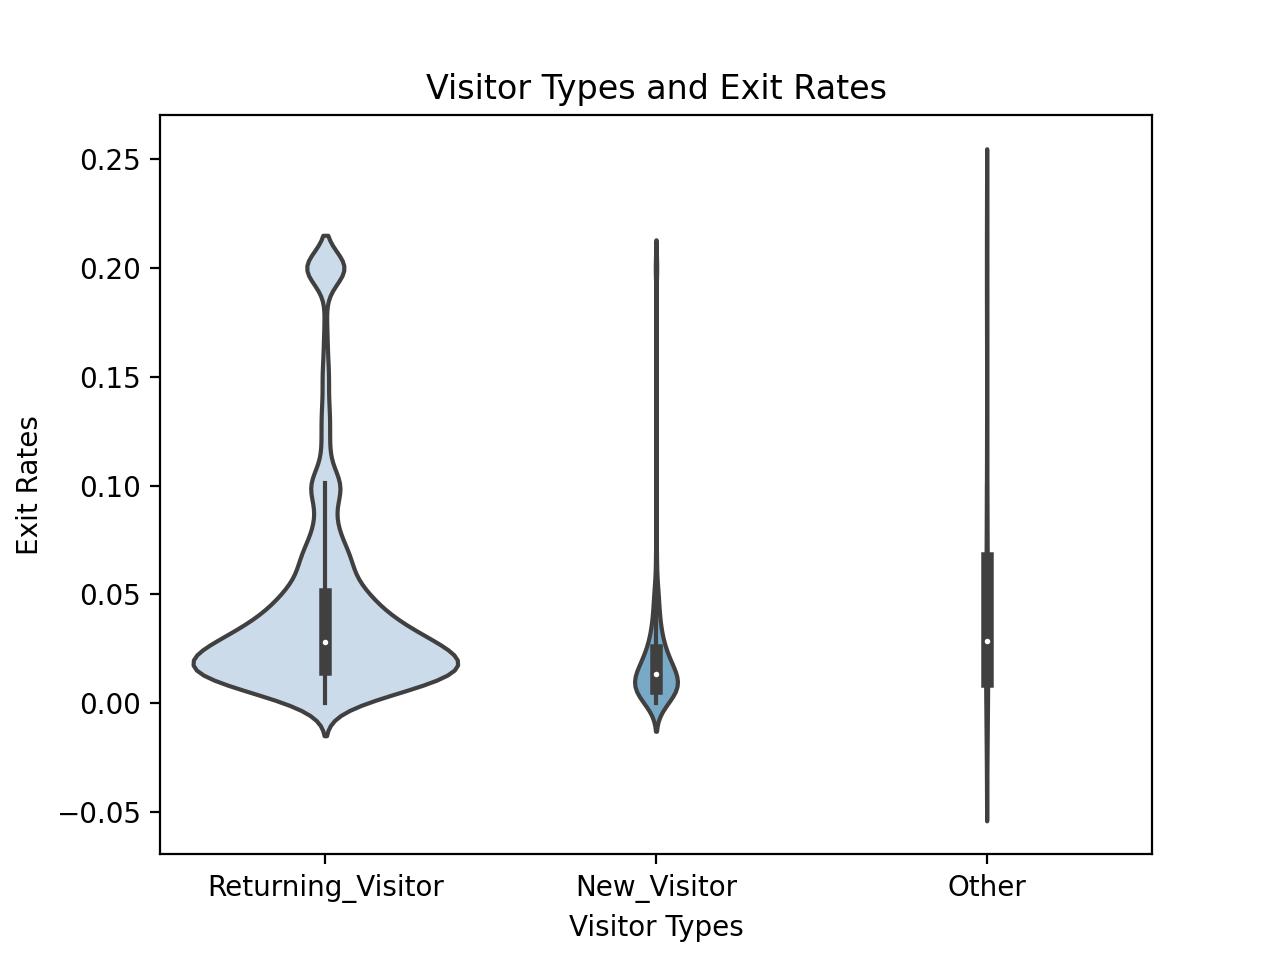

In [28]:
%matplotlib notebook

sns.violinplot(data = test, 
               x = 'VisitorType', y = 'ExitRates',
               scale = 'count', 
              palette = "Blues")
plt.title('Visitor Types and Exit Rates')
plt.xlabel('Visitor Types')
plt.ylabel('Exit Rates');

Based on the violin plot above, we can conclude "returning visitor" has a greater exit rate probability between 0.00 and 0.05, near the interquartile range. The "New Visitor Type" also has a similar plot in terms of IQR and median, yet it is less distributed and concentrated in probability. All three vistor types have similar median values and "other" has a greater IQR with greater distributed data presented by the gray line. 

In [29]:
from collections import Counter 
import math

In [30]:
## Start of knn model##

#transforming categorical data into numericaldummy variables  

clean_df['Month']=pd.factorize(clean_df['Month'])[0] 
#0=Feb , 1=Mar, 2=May, 3=Oct, 4=June, 5=July, 6=Aug, 7=Nov, 8=Sep, 9=Dec

clean_df['VisitorType']=pd.factorize(clean_df['VisitorType'])[0]
#0=False, 1=True 

clean_df['Weekend']=pd.factorize(clean_df['Weekend'])[0]
#0=False, 1=True 

clean_df.tail()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,Month,VisitorType,Weekend,Revenue
12325,12,248.228571,0.0,0.0,66,1158.782857,0.009722,0.022569,0.000000,9,0,0,False
12326,1,28.533333,0.0,0.0,61,2006.688158,0.003279,0.015460,2.039270,9,0,0,False
12327,3,117.850000,0.0,0.0,9,492.900000,0.000000,0.028571,29.462088,9,0,0,False
12328,0,0.000000,4.0,112.6,93,2299.970000,0.002778,0.010937,16.959078,9,0,0,True
12329,6,265.400000,0.0,0.0,6,161.600000,0.000000,0.022222,0.000000,9,1,0,False


In [31]:
clean_df['Revenue'].value_counts()

False    10301
True      1908
Name: Revenue, dtype: int64

In [32]:
clean_df.shape

(12209, 13)

In [33]:
#building the model 
X = clean_df.iloc[:, 0:11].values
y = clean_df.iloc[:,12].values

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [36]:
# shape of train and test objects
print(X_train.shape)
print(X_test.shape)

(9767, 11)
(2442, 11)


In [37]:
print(y_train.shape)
print(y_test.shape)

(9767,)
(2442,)


In [38]:
#fitting the model 

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

k_range = range(1,26)

scores = {}

scores_list = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    
    #predict the variable
    y_pred = knn.predict(X_test)
    
    scores[k] = metrics.accuracy_score(y_test, y_pred)
    
    #appending the scores
    scores_list.append(metrics.accuracy_score(y_test, y_pred))

In [39]:
#evalaute the model 
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.90      0.98      0.94      2038
        True       0.79      0.46      0.58       404

    accuracy                           0.89      2442
   macro avg       0.85      0.72      0.76      2442
weighted avg       0.88      0.89      0.88      2442

[[1990   48]
 [ 220  184]]


In [43]:
#calculating accuracy score 
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8902538902538902

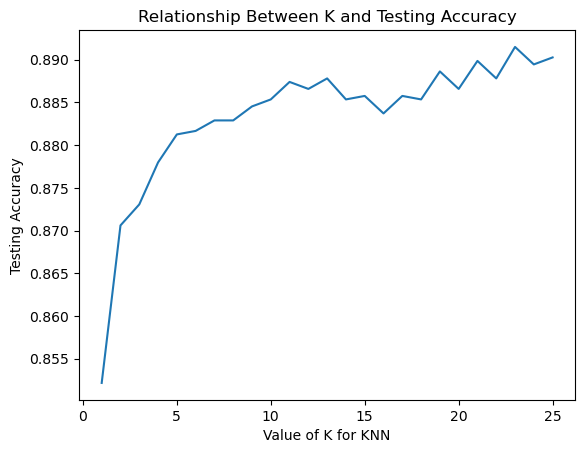

In [42]:
%matplotlib inline

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(k_range, scores_list)
plt.title('Relationship Between K and Testing Accuracy')
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy');

Once scaling the data and running the K Nearest Neighbor, we can see the predicted Revenue variable is 'False' given a precision of 0.90. The accuracy of the KNN model is 88.49%, in other words 88% of the predictions from the model are correct, reflecting a good model that is not too overfit. It can be argued the model is overfit to an extent since there are more false values than true values. 